In [1]:
from PyUncertainNumber.UC.uncertainNumber import UncertainNumber as UN
from PyUncertainNumber.UC.statisticalInference import *
from PyUncertainNumber.UC.utils import pl_ecdf, pl_pcdf

In [2]:
from scipy.stats import CensoredData

In [3]:
%load_ext autoreload
%autoreload 2
%load_ext rich
%matplotlib inline

# precise data

## MLE method

In [ ]:
# test data from Scott

datat = 2 * np.random.normal(size=25)

In [ ]:
dist = MLnormal(datat)

In [ ]:
dist

In [ ]:
_ = pl_pcdf(dist, title='Gaussian MLE estimated dist given precise data')

# imprecise data

My current idea will be:

- UN produces pbox via MLE and MoM
- sps still returns precise distribution object anyway.

In [4]:
scott_rawData = [[8,11], [5.5,6.9], [0.3, 1.3], [3.5,7.5], [0.8,1], [2.8,4.2], [1.8,5.2], [2.2,5.2], [3.5,5.7], [5.3,6.1]]

In [5]:
''' vanilla scipy imp which looks weird '''
# data_imp = CensoredData(interval=scott_rawData)
# data_imp

' vanilla scipy imp which looks weird '

In [6]:
lo_endpoints = [it[0] for it in scott_rawData] # Low ends of the intervals
hi_endpoints = [it[1] for it in scott_rawData] # High ends of the intervals

In [7]:
data_i = CensoredData.interval_censored(low=lo_endpoints, high=hi_endpoints)
print(data_i)

CensoredData(10 values: 0 not censored, 10 interval-censored)


In [8]:
''' the same as data_imp '''
data_i

CensoredData(uncensored=array([], dtype=float64), left=array([], dtype=float64), right=array([], dtype=float64), interval=array([[ 8. , 11. ], [ 5.5, 6.9], [ 0.3, 1.3], [ 3.5, 7.5], [ 0.8, 1. ], [ 2.8, 4.2], [ 1.8, 5.2], [ 2.2, 5.2], [ 3.5, 5.7], [ 5.3, 6.1]]))

In [26]:
type(data_i)

<class 'scipy.stats._censored_data.CensoredData'>

In [10]:
dist_i_scipy = MLnormal(data_i)

In [23]:
# we do get to see the params of a scipy.stats.frozon object
dist_i_scipy.args

(np.float64(4.326522375417396), np.float64(2.376818076563358))

In [24]:
# dir(dist_i_scipy)

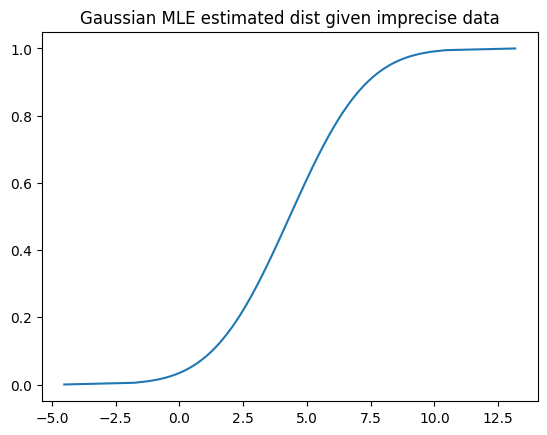

In [25]:
_ = pl_pcdf(dist_i_scipy, title='Gaussian MLE estimated dist given imprecise data')